# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

# Research Question 

## How are housing price and Homelessness attributes correlated? 


## Definitions


df = This is the first data, from kaggle that Have been scrapped from Realtor website. 

df2 = This is the second data, The Homelessness, in the period 2007 - 2016 - Kaggle. 


In [6]:
!python -m pip install kaggle==1.6.12

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

>I would like to work on Real estate in USA

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import requests
import zipfile
import json
import requests
import os



# Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

I gathered these 2 data because I am interested in the real estate market and its effects on societies. In this notebook I will study the market of USA and its impact on the number of homeless. 

### **1.2.** Gather at least two datasets using two different data gathering methods

## Dataset 1 
The first data set is a spreadsheet a full of informations about the USA housing data, prices, places and dates and of sold or not, I downlowded it manully from Kaggle, and this data was collected from https://www.realtor.com/ - A real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. 
I choosed this dataset to study the housing market in USA. Download it manually. 


In [11]:
df = pd.read_csv("realtor-data.zip.csv")


## Dataset 2

The Seconed Dataset is about homelessness is USA it has 2 csv files, homlessness in the period 2007 - 2016 and population csv. 
These raw data sets contain Point-in-Time (PIT) estimates and national PIT estimates of homelessness as well as national estimates of homelessness by state and estimates of chronic homelessness from 2007 - 2016. Estimates of homeless veterans are also included beginning in 2011. The accompanying Housing Inventory Count (HIC) data is available as well from 2007 - 2016." (Department of Housing and Urban Development).
> Type: zip File, CSV File

> Method: The data was gathered using the "API" method from Kaggle.
> Dataset variables:
Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', count

omes in $1000's

In [13]:
import kaggle

In [14]:
from kaggle.api.kaggle_api_extended import KaggleApi


In [15]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("adamschroeder/homelessness",
                           "/2007-2016-Homelessnewss-USA.csv")

Dataset URL: https://www.kaggle.com/datasets/adamschroeder/homelessness


In [16]:

zip_file_path = "C:\\2007-2016-Homelessnewss-USA.csv\\homelessness.zip"

# Define the directory to extract the files to
extract_dir = "7-2016-Homelessnewss-USA.csv"  # Replace with the directory where you want to extract the files

# Unzip the downloaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove the downloaded zip file
os.remove(zip_file_path)






# Asses Virtually 

In [18]:
df2 = pd.read_csv('7-2016-Homelessnewss-USA.csv/2007-2016-Homelessnewss-USA.csv')

In [19]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


I have A lot of Nulls in The "prev_sold_date" 

In [21]:
df.tail(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226372,108243.0,sold,425000.0,3.0,3.0,0.06,970797.0,Richland,Washington,99354.0,1876.0,2022-02-14
2226373,16235.0,sold,305000.0,4.0,2.0,0.42,353937.0,Richland,Washington,99354.0,2000.0,2022-02-11
2226374,53860.0,sold,310000.0,3.0,1.0,0.21,500240.0,Richland,Washington,99354.0,1152.0,2022-02-11
2226375,60631.0,sold,385000.0,4.0,2.0,0.21,210890.0,Richland,Washington,99354.0,1656.0,2022-03-28
2226376,85499.0,sold,339900.0,4.0,2.0,0.20,41160.0,Richland,Washington,99354.0,2780.0,2022-03-28
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [22]:
df.describe() 

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [23]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [24]:
!pip install kaggle

In [25]:
print(df.isnull().sum())


brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [26]:
print(df.duplicated().sum())


0


Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

"dirty data and messy data.

Inaccurate data is an example of dirty data, i.e., a data quality issue. High data quality is crucial for obtaining reliable insights and driving informed decision-makin.

Unorganized data is an example of messy data, i.e., a data structural issue. With tidy data, we can focus on performing additional assessments and cleaning without dealing with roadblocks around getting the data into a structure that's easier to view and pa" 
 data.rse.

In [28]:
df2.head(10)

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
5,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless Individuals,589
6,1/1/2007,AK,AK-500,Anchorage CoC,Sheltered Homeless People in Families,253
7,1/1/2007,AK,AK-500,Anchorage CoC,Total Homeless,974
8,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Chronically Homeless Individuals,37
9,1/1/2007,AK,AK-500,Anchorage CoC,Unsheltered Homeless,132


In [29]:
df2.tail(10)

,Year,State,CoC Number,CoC Name,Measures,Count
86519,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless,366
86520,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Individuals,240
86521,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless People in Families,126
86522,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Children (U...,2
86523,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Young Adult...,5
86524,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3
86528,1/1/2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Under 18,0


In [99]:
df2.describe()

,Year,State,CoC Number,CoC Name,Measures,Count
count,86529,86529,86529,86529,86529,86529
unique,10,54,414,414,42,3608
top,1/1/2015,CA,AK-500,Anchorage CoC,Chronically Homeless Individuals,0
freq,16926,8946,216,216,3999,12209


In [101]:
print(df2.isnull().sum())


Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64


In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [105]:
df2.columns

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')

In [107]:
df2.value_counts()

Year      State  CoC Number  CoC Name                                 Measures                                           Count
1/1/2007  AK     AK-500      Anchorage CoC                            Chronically Homeless Individuals                   224      1
1/1/2015  IL     IL-504      Madison County CoC                       Homeless Unaccompanied Youth (Under 25)            1        1
                                                                      Sheltered Chronically Homeless People in Families  10       1
                                                                      Sheltered Chronically Homeless Individuals         5        1
                                                                      Sheltered Chronically Homeless                     15       1
                                                                                                                                 ..
1/1/2012  CO     CO-503      Metropolitan Denver Homeless Initiative  Chronically

### Quality Issue and Tidiness Issues (Notes for myself)


> data quality:

  * *Completeness: is a metric that helps you understand whether your data is sufficient to answer interesting questions or solve your problem*

 *  *Validity is a metric helping you understand how well your data conforms to a defined set of rules for data, also known as a schema* 
   
* Accuracy is a metric that helps you understand whether your data accurately represents the reality it aims to depict.* 
* Consistency is a metric that helps you understand two things: whether your data follows a standard format and whether your data’s info matches with information from other data sources.
* Uniqueness is a metric that helps you understand whether there are duplicate or overlapping values in your data.

#FILL IN - Inspecting the data frame visually 

*  The shape of the df is huge It covers a lot of years, but df2 covers from 2007 to 2016: *So We have to limit the shape according to year. 
**( drop the data after 2017 | 12/2016  so it fits with the second dataset, or Filter the DataFrame to include only data from 2007 to 2016)** 
> And the code for this is: 
 df = df[(df['Year'] >= 2007) & (df['Year'] <= 2016)]   
- Year here is (prev_sold_date) So it have to be renamed either ways to ["Year"] which is object have to be changed to datetime.
- The prev_sold_date  object, and it must be datatime. And it's important to notice that this column gives us an information saying this the "Sold date", So I have to use this information correctly to connect the 2 datasets, it's important to notice it might be a key column instead of the state.
-  I have in df['prev_sold_date'] a 734297 null value.. first, I will reshape the data, then decide on how to deal with 
    date null values. 

* In df2 "count" must be integers.

* df Have a lot of nulls. However, the most needed ones is the prices and the state.( And df2 does not have any nulls.X)
* To Fix this issue, I must define the necessary columns in both datas. 
  - necessary_columnsdf = df['Price', 'State', 'sold_date/ Year']
  - necessary_columnsdf2 = df2['State', 'Year', 'Measures', 'counts']
* * df have 8 missing Values in ['State'] I have to change it to ['unknown'] or fill it manually by knowing the city. 

* In df2 ["States"] must be defined by name So I have to change it be matches df1.

  > df2['State'] = df2['State'].replace({'Alaska':'AK', 'Alabama':'AL', 'Arkansas':'AR', 'Arizona':'AZ', 
                      'California':'CA', 'Colorado':'CO', 'Connecticut':'CT', 
                      'District of Columbia':'DC', 'Delaware':'DE', 'Florida':'FL', 
                      'Georgia':'GA', 'Hawaii':'HI', 'Iowa':'IA', 
                      'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Kansas':'KS', 
                      'Kentucky':'KY', 'Louisiana':'LA', 'Massachusetts':'MA', 'Maryland':'MD', 
                      'Maine':'ME', 'Michigan':'MI', 'Minnesota':'MN', 'Missouri':'MO', 
                      'Mississippi':'MS', 'Montana':'MT', 'North Carolina':'NC', 
                      'North Dakota':'ND', 'Nebraska':'NE', 'New Hampshire':'NH', 
                      'New Jersey':'NJ', 'New Mexico':'NM', 'Nevada':'NV', 'New York':'NY', 
                      'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 
                      'Puerto Rico':'PR', 'Rhode Island':'RI', 'South Carolina':'SC', 
                      'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 
                      'Virginia':'VA', 'Vermont':'VT', 'Washington':'WA', 
                      'Wisconsin':'WI', 'West Virginia':'WV', 'Wyoming':'WY'})

* In df2 Measures addresses many kind of "Homelessness", which are Homeless Individuals',' Homeless People in Families', 'Unsheltered Homeless', We can make it moinge Tidy make it i \\\\\ also there is " Unsheltered Parenting Youth Under 18" And "...Under 25.." n one category
   > hodf2ols = homeless['Measures'].str.df2ies()
homeless.join(homeless_cols[['Homeless Individuals','Homeless People in Families', 'Unshelter
     - Homeless']]*
* But still,I dont think we have to make it in categories.-  Instead, I Think I have to collect the "count" number in one re
  ult per state. 
 bject

In [109]:
df.shape

(2226382, 12)

In [111]:
df2.shape

(86529, 6)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  object
dtypes: object(6)
memory usage: 4.0+ MB


In [117]:
df.sample(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1748357,79271.0,sold,199900.0,2.0,2.0,NaN,551611.0,Hoover,Alabama,35226.0,1428.0,2021-11-12
2077521,4699.0,sold,999998.0,4.0,3.0,0.46,426562.0,Chino Hills,California,91709.0,2233.0,2022-04-22
663892,7714.0,for_sale,159900.0,3.0,1.0,0.33,101061.0,Muldraugh,Kentucky,40155.0,1334.0,NaN
2021316,45055.0,sold,475000.0,4.0,2.0,0.15,500808.0,Gilbert,Arizona,85234.0,1710.0,2022-01-14
1567637,22611.0,sold,99900.0,3.0,1.0,0.76,1797847.0,Deal Island,Maryland,21821.0,1008.0,2022-04-08


In [119]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [121]:
df2.sample(5)

,Year,State,CoC Number,CoC Name,Measures,Count
27636,1/1/2012,AL,AL-501,Mobile City & County/Baldwin County CoC,Sheltered Homeless Veterans,12
45760,1/1/2014,FL,FL-501,Tampa/Hillsborough County CoC,Total Homeless,"1,944"
70172,1/1/2016,AR,AR-503,Arkansas Balance of State CoC,Sheltered Homeless Veterans,14
30861,1/1/2012,MA,MA-510,Gloucester/Haverhill/Salem/Essex County CoC,Homeless Individuals,266
33341,1/1/2012,NY,NY-512,Troy/Rensselaer County CoC,Homeless Veterans,8


In [123]:
print(df.isnull().sum())

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [125]:
print(df.columns)

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')


In [127]:
print(df2.isnull().sum())

Year          0
State         0
CoC Number    0
CoC Name      0
Measures      0
Count         0
dtype: int64


In [129]:
df2['Measures'].unique()

array(['Chronically Homeless Individuals', 'Homeless Individuals',
       'Homeless People in Families',
       'Sheltered Chronically Homeless Individuals', 'Sheltered Homeless',
       'Sheltered Homeless Individuals',
       'Sheltered Homeless People in Families', 'Total Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless', 'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families', 'Chronically Homeless',
       'Chronically Homeless People in Families', 'Homeless Veterans',
       'Sheltered Chronically Homeless',
       'Sheltered Chronically Homeless People in Families',
       'Sheltered Homeless Veterans', 'Unsheltered Chronically Homeless',
       'Unsheltered Chronically Homeless People in Families',
       'Unsheltered Homeless Veterans', 'Children of Parenting Youth',
       'Homeless Unaccompanied Children (Under 18)',
       'Homeless Unaccompanied Young Adults (Age 18-24)',
       'Homeless Unaccompan

In [131]:
df2['Measures'].nunique()

42

In [133]:
df2['Measures']. duplicated().sum()

86487

In [135]:
df2['Measures']. isnull().sum()

0

In [137]:
df2['Measures'].value_counts

<bound method IndexOpsMixin.value_counts of 0                         Chronically Homeless Individuals
1                                     Homeless Individuals
2                              Homeless People in Families
3               Sheltered Chronically Homeless Individuals
4                                       Sheltered Homeless
                               ...                        
86524    Unsheltered Homeless Unaccompanied Youth (Unde...
86525                        Unsheltered Homeless Veterans
86526               Unsheltered Parenting Youth (Under 25)
86527                Unsheltered Parenting Youth Age 18-24
86528                 Unsheltered Parenting Youth Under 18
Name: Measures, Length: 86529, dtype: object>

### Quality Issue 1:

1- I have in df['prev_sold_date'] a 734297 null value.. first, I will reshape the data, then decide on how to deal with 
    date null values. 

2-  Year here is (prev_sold_date) So it has to be renamed either way to ["Year"] which means the object has
to be changed to datetime.

3- df: NAn in  "states" are 8 

### Quality Issue 2:

2-  In df2 "count" must be integers.

### Tidiness Issue 1:


1- df2 "States" are in capital letters 

### Tidiness Issue 2:


df2 "measures" have diffrent categories. 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

# For the porpuse of combine 

Here is to make the time zone for df the same as df2: 
- Rename prev_sold_date To "Year". 
- dtype: datetime
- 1/1/2006 - 31/12/2017 

In [143]:
df.rename(columns= {'prev_sold_date': 'Year'}, inplace= True)  

Check: 

In [146]:
df.sample(1)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,Year
2050179,109914.0,sold,290000.0,2.0,2.0,0.01,749652.0,Sparks,Nevada,89431.0,1424.0,2022-04-27


Change the dtype for Year because it's object

In [149]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

Check

In [152]:
df.dtypes

brokered_by           float64
status                 object
price                 float64
bed                   float64
bath                  float64
acre_lot              float64
street                float64
city                   object
state                  object
zip_code              float64
house_size            float64
Year           datetime64[ns]
dtype: object

In [154]:
df['Year']. isnull().sum()

734298

Now, lemit the df dataframe

In [157]:
df = df[(df['Year'].dt.year >= 2007) & (df['Year'].dt.year <= 2016)]


In [159]:
df['Year']

2270      2013-10-11
2493      2016-04-28
2555      2016-11-16
3062      2010-01-26
3409      2014-06-25
             ...    
1414189   2015-12-18
1414192   2013-03-26
1414316   2007-06-12
1414327   2011-09-09
1414346   2014-03-07
Name: Year, Length: 199269, dtype: datetime64[ns]

Check, The shape of df was (2226382, 12)

In [162]:
df.shape

(199269, 12)

In [164]:
df['Year']. isnull().sum()

0

In [166]:
print(df.isnull().sum())

brokered_by      151
status             0
price             69
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


In [171]:
check = 2226382 - 199569
print(check)

2026813


So, I've dropped 2026813 intries. I have to check the nulls. 

In [174]:
print(df.isnull().sum())

brokered_by      151
status             0
price             69
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


Now,
- I have no nulls in the Year Column. 
- I have no nulls in the State Column
- I have 69 in the Price column. I can fill it with th mean of every year to care about the accuracy. 

### **Quality Issue 1: FILL IN**

##### FILL IN - Validate the cleaning was successful
##### Here,  I must fill the Na in prices with the mean of the corresponding year.

##### Calculate the mean price for each year
mean_prices = df.groupby('Year')["price"].transform('mean')

###### Fill missing prices with the mean price of the corresponding year
df["price"] = df["price"].fillna(mean_prices)

###### Display the DataFrame after filling missing prices
print("DataFrame after filling missing prices with the mean price of each year:")
print(df)


In [229]:
print(df.isnull().sum())

brokered_by      151
status             0
price              0
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


In [176]:
df['price']. nunique()

9110

In [189]:
Mean = df['price'].mean()

In [193]:
df['price'].fillna(Mean, inplace=True)


Check: 

In [195]:
print(df.isnull().sum())

brokered_by      151
status             0
price              0
bed            21374
bath           20529
acre_lot       29659
street           828
city              18
state              0
zip_code           1
house_size     30312
Year               0
dtype: int64


In [227]:
df['price']. nunique()

9111

### **Quality Issue 2: FILL IN**

In [197]:
df2.columns

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count'], dtype='object')

In [201]:
df2['Count'] = df2['Count'].str.replace(',', '').astype(float)

In [203]:
df2['Count'] = df2['Count'].astype(int) # In df2 "count" must be integers


Check

In [206]:
#FILL IN - Validate the cleaning was successful
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        86529 non-null  object
 1   State       86529 non-null  object
 2   CoC Number  86529 non-null  object
 3   CoC Name    86529 non-null  object
 4   Measures    86529 non-null  object
 5   Count       86529 non-null  int32 
dtypes: int32(1), object(5)
memory usage: 3.6+ MB


Now, The Years Column is object here too, and it must be datetime too. 

### **Quality Issue 3:**

In [294]:
from datetime import datetime

In [648]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.date
df['Year'].unique()

array([datetime.date(2015, 8, 21), datetime.date(2008, 3, 10),
       datetime.date(2010, 5, 4), ..., datetime.date(2013, 1, 21),
       datetime.date(2008, 1, 21), datetime.date(2014, 1, 20)],
      dtype=object)

In [642]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85881 entries, 44442 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         85881 non-null  object
 1   State        85881 non-null  object
 2   Count        85881 non-null  int32 
 3   Sheltered    85881 non-null  bool  
 4   Unsheltered  85881 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 2.5+ MB


In [644]:
df['Year'].unique()

<DatetimeArray>
['2015-08-21 00:00:00', '2008-03-10 00:00:00', '2010-05-04 00:00:00',
 '2007-08-30 00:00:00', '2008-02-20 00:00:00', '2007-08-20 00:00:00',
 '2016-04-12 00:00:00', '2015-07-06 00:00:00', '2007-09-04 00:00:00',
 '2009-01-14 00:00:00',
 ...
 '2008-06-28 00:00:00', '2010-03-27 00:00:00', '2007-05-19 00:00:00',
 '2015-11-11 00:00:00', '2010-03-20 00:00:00', '2013-10-26 00:00:00',
 '2009-11-21 00:00:00', '2013-01-21 00:00:00', '2008-01-21 00:00:00',
 '2014-01-20 00:00:00']
Length: 2823, dtype: datetime64[ns]

### **Tidiness Issue 1: FILL IN**

In [324]:
#FILL IN - Apply the cleaning strategy
# Here I have to change the state column so when I combine the data make sense. 

state_abbr_to_full = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland',
    'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi', 'MT': 'Montana',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington',
    'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming', 'VI': 'Virgin Islands', 'GU': 'Guam'
}

# Replace state abbreviations with full names
df2['State'] = df2['State'].replace(state_abbr_to_full)

#States in df2 but not in df:
#{'Puerto Rico', 'VI', 'GU'}

#States in df but not in df2:
#{'Virgin Islands'}

In [326]:
print(df2['State'].unique())

['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'North Carolina' 'North Dakota'
 'Nebraska' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia'
 'Virgin Islands' 'Vermont' 'Washington' 'Wisconsin' 'West Virginia'
 'Wyoming']


Check

In [347]:
df2.sample(5)

,Year,State,CoC Number,CoC Name,Measures,Count
41745,2013-01-01,New York,NY-512,Troy/Rensselaer County CoC,Sheltered Homeless,142
21552,2011-01-01,Illinois,IL-504,Madison County CoC,Unsheltered Homeless Individuals,42
64358,2015-01-01,New York,NY-510,Ithaca/Tompkins County CoC,Homeless People in Families,33
22556,2011-01-01,Massachusetts,MA-516,Massachusetts Balance of State,Unsheltered Chronically Homeless,13
58601,2015-01-01,Kansas,KS-507,Kansas Balance of State CoC,Chronically Homeless Individuals,129


In [349]:
df2['State'].nunique()

54

In [350]:
df['State']. nunique()

52

In [351]:
df.duplicated(). sum()

0

In [352]:
df2.duplicated(). sum()

0

I have 2 more issues for the seek of combine 
> 
1- The state is in df2 in capital and in df is small. Must change to capital 
2- There is 2 more "State" in df2. 

In [354]:
df.rename(columns={'state': 'State'}, inplace=True)


In [355]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,State,zip_code,house_size,Year
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2493,22968.0,for_sale,79500.0,NaN,NaN,0.76,765975.0,Christiansted,Virgin Islands,820.0,NaN,2016-04-28
2555,34543.0,for_sale,176500.0,NaN,NaN,0.50,917409.0,Christiansted,Virgin Islands,820.0,NaN,2016-11-16
3062,22968.0,for_sale,129000.0,NaN,NaN,6.30,739696.0,Frederiksted,Virgin Islands,840.0,NaN,2010-01-26
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25


In [356]:

# Get the unique states in both DataFrames
unique_states_df = set(df['State'].unique())
unique_states_df2 = set(df2['State'].unique())

# Find states that are in df2 but not in df
states_in_df2_not_in_df = unique_states_df2 - unique_states_df

# Find states that are in df but not in df2
states_in_df_not_in_df2 = unique_states_df - unique_states_df2

print("States in df2 but not in df:")
print(states_in_df2_not_in_df)

print("\nStates in df but not in df2:")
print(states_in_df_not_in_df2)




States in df2 but not in df:
{'Puerto Rico', 'Guam'}

States in df but not in df2:
set()


#### So, I must drop States in df2 but not in df: 
{'Puerto Rico', 'Guam' 

- Now, I want to check the year column for tidiness purposes. I have noticed that the entries of the Year column are not tidy in df but they are tidy in df2.}

df =df.sort_values(by='Year').reset_index(drop=True)

In [366]:
df.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,State,zip_code,house_size,Year
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2493,22968.0,for_sale,79500.0,NaN,NaN,0.76,765975.0,Christiansted,Virgin Islands,820.0,NaN,2016-04-28
2555,34543.0,for_sale,176500.0,NaN,NaN,0.50,917409.0,Christiansted,Virgin Islands,820.0,NaN,2016-11-16
3062,22968.0,for_sale,129000.0,NaN,NaN,6.30,739696.0,Frederiksted,Virgin Islands,840.0,NaN,2010-01-26
3409,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,2014-06-25


In [368]:
df2.sample(5)

,Year,State,CoC Number,CoC Name,Measures,Count
5138,2008-01-01,California,CA-507,Marin County CoC,Homeless People in Families,156
4892,2008-01-01,Alabama,AL-503,Huntsville/North Alabama CoC,Unsheltered Chronically Homeless Individuals,77
21543,2011-01-01,Illinois,IL-504,Madison County CoC,Sheltered Homeless,207
2817,2007-01-01,North Carolina,NC-505,Charlotte/Mecklenberg CoC,Unsheltered Homeless,328
78046,2016-01-01,Michigan,MI-513,"Marquette, Alger Counties CoC",Chronically Homeless,1


# Measures 
*I have 42 kinds about Homeless people, So I will make them in 2 categories*

1- Sheltered 
2- Unsheltered.
However, I Still will have ['Chronically Homeless'] and ['Total Homeless'] not recognized. I will consider "Chronically Homeless" as Unsheltered Homeless Because "Chronically" must mean that. 
And, Total homeless means both sheltered and unsheltered I will consider the number in both sheltered and unsheltered. 


In [371]:
# Define keywords for categorization
sheltered_keywords = ['Sheltered', 'Parenting Youth', 'Chronically Homeless', 'Total Homeless', 'Homeless People in Families'] 
unsheltered_keywords = ['Unsheltered', 'Chronically Homeless', 'Homeless Unaccompanied', 'Total Homeless', 'Homeless Individuals']

# Categorize measures into 'Sheltered' and 'Unsheltered'
df2.loc[:, 'Sheltered'] = df2['Measures'].apply(lambda x: any(keyword in x for keyword in sheltered_keywords))
df2.loc[:, 'Unsheltered'] = df2['Measures'].apply(lambda x: any(keyword in x for keyword in unsheltered_keywords))


# Display DataFrame
print(df2)

             Year    State CoC Number               CoC Name  \
0      2007-01-01   Alaska     AK-500          Anchorage CoC   
1      2007-01-01   Alaska     AK-500          Anchorage CoC   
2      2007-01-01   Alaska     AK-500          Anchorage CoC   
3      2007-01-01   Alaska     AK-500          Anchorage CoC   
4      2007-01-01   Alaska     AK-500          Anchorage CoC   
...           ...      ...        ...                    ...   
86524  2016-01-01  Wyoming     WY-500  Wyoming Statewide CoC   
86525  2016-01-01  Wyoming     WY-500  Wyoming Statewide CoC   
86526  2016-01-01  Wyoming     WY-500  Wyoming Statewide CoC   
86527  2016-01-01  Wyoming     WY-500  Wyoming Statewide CoC   
86528  2016-01-01  Wyoming     WY-500  Wyoming Statewide CoC   

                                                Measures  Count  Sheltered  \
0                       Chronically Homeless Individuals    224       True   
1                                   Homeless Individuals    696      False 

In [373]:
df2.columns

Index(['Year', 'State', 'CoC Number', 'CoC Name', 'Measures', 'Count',
       'Sheltered', 'Unsheltered'],
      dtype='object')

I have To drop Measures, After I make a copy.
**Drop the 'Measures' column**
df2 = df2.drop(columns=['Measures'])

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [377]:
#FILL IN - Remove unnecessary variables and combine datasets
# necessary_columnsdf = df['Price', 'State', 'Year']
# necessary_columnsdf2 = df2['State', 'Year', 'Measures', 'counts']

df  = df.drop(columns = ['brokered_by','bed', 'bath', 'acre_lot', 'street',
       'city', 'zip_code', 'house_size'])
df2 = df2.drop(columns= ['CoC Number', 'CoC Name', 'Measures'])





Check

In [380]:
df.head(2)

,status,price,State,Year
2270,for_sale,950000.0,Virgin Islands,2013-10-11
2493,for_sale,79500.0,Virgin Islands,2016-04-28


In [382]:
df2.head(2)

,Year,State,Count,Sheltered,Unsheltered
0,2007-01-01,Alaska,224,True,True
1,2007-01-01,Alaska,696,False,True


In [384]:
df2.columns

Index(['Year', 'State', 'Count', 'Sheltered', 'Unsheltered'], dtype='object')

In [386]:
df.columns

Index(['status', 'price', 'State', 'Year'], dtype='object')

In [388]:
df['price'].unique()

array([950000.,  79500., 176500., ..., 516900., 462999., 353333.])

In [390]:
df = df.drop(columns= ['status'])

In [392]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86529 entries, 0 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         86529 non-null  object
 1   State        86529 non-null  object
 2   Count        86529 non-null  int32 
 3   Sheltered    86529 non-null  bool  
 4   Unsheltered  86529 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 1.8+ MB


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199269 entries, 2270 to 1414346
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   199269 non-null  float64
 1   State   199269 non-null  object 
 2   Year    199269 non-null  object 
dtypes: float64(1), object(2)
memory usage: 6.1+ MB


- So, I must drop States in df2 but not in df: 
{'Puerto Rico', 'Guam}'

In [401]:
# States in df but not in df2
states_to_drop = {'Puerto Rico', 'Guam'}

 # Drop rows in df2 where the state is in states_to_drop
df2 = df2[~df2['State'].isin(states_to_drop)]

In [403]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85881 entries, 0 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         85881 non-null  object
 1   State        85881 non-null  object
 2   Count        85881 non-null  int32 
 3   Sheltered    85881 non-null  bool  
 4   Unsheltered  85881 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 2.5+ MB


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

# DF 2 - Homelessness in USA

In [407]:
# Save raw data to CSV
df2.to_csv('raw_homeless_data.csv', index=False)

In [409]:
df2.head()

,Year,State,Count,Sheltered,Unsheltered
0,2007-01-01,Alaska,224,True,True
1,2007-01-01,Alaska,696,False,True
2,2007-01-01,Alaska,278,True,False
3,2007-01-01,Alaska,187,True,True
4,2007-01-01,Alaska,842,True,False


In [413]:
df2. info()

<class 'pandas.core.frame.DataFrame'>
Index: 85881 entries, 0 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         85881 non-null  object
 1   State        85881 non-null  object
 2   Count        85881 non-null  int32 
 3   Sheltered    85881 non-null  bool  
 4   Unsheltered  85881 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 2.5+ MB


In [415]:
df2.to_csv('cleaned_homeless_data.csv', index=False)

print("Raw and cleaned data have been saved to CSV files.")


Raw and cleaned data have been saved to CSV files.


# DF 1 : Real Estate in USA 

In [418]:
df.to_csv('cleaned_Houses_MArket_USA_data.csv', index=False)

In [422]:
df.head()

,price,State,Year
2270,950000.0,Virgin Islands,2013-10-11
2493,79500.0,Virgin Islands,2016-04-28
2555,176500.0,Virgin Islands,2016-11-16
3062,129000.0,Virgin Islands,2010-01-26
3409,525000.0,Massachusetts,2014-06-25


- I should have reset the index before saving 

- the years changing it to dt.date,, meant anything ?  

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199269 entries, 2270 to 1414346
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   199269 non-null  float64
 1   State   199269 non-null  object 
 2   Year    199269 non-null  object 
dtypes: float64(1), object(2)
memory usage: 6.1+ MB


In [428]:
df.loc[:, 'price'] = df['price'].astype(np.float32)

the float didn't change from 64 to 32

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199269 entries, 2270 to 1414346
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   199269 non-null  float64
 1   State   199269 non-null  object 
 2   Year    199269 non-null  object 
dtypes: float64(1), object(2)
memory usage: 6.1+ MB


In [433]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85881 entries, 0 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         85881 non-null  object
 1   State        85881 non-null  object
 2   Count        85881 non-null  int32 
 3   Sheltered    85881 non-null  bool  
 4   Unsheltered  85881 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 2.5+ MB


In [439]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85881 entries, 0 to 86528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         85881 non-null  object
 1   State        85881 non-null  object
 2   Count        85881 non-null  int32 
 3   Sheltered    85881 non-null  bool  
 4   Unsheltered  85881 non-null  bool  
dtypes: bool(2), int32(1), object(2)
memory usage: 2.5+ MB


In [441]:
# Change to the desired directory 

os.chdir('D:/')

# Verify the change 

print(os.getcwd())

D:\


In [481]:
df['State'].unique()

array(['Virgin Islands', 'Massachusetts', 'Connecticut', 'New Hampshire',
       'Vermont', 'New York', 'Rhode Island', 'Maine', 'New Jersey',
       'Pennsylvania', 'Delaware', 'Ohio', 'West Virginia', 'Maryland',
       'Virginia', 'District of Columbia', 'North Carolina', 'Kentucky',
       'Tennessee', 'South Carolina', 'Georgia', 'Alabama', 'Florida',
       'Mississippi', 'Arkansas', 'Missouri', 'Louisiana', 'Indiana',
       'Illinois', 'Michigan', 'Wisconsin', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Idaho',
       'Kansas', 'Oklahoma', 'Colorado', 'Wyoming', 'Texas', 'New Mexico',
       'Utah', 'Nevada', 'Washington', 'Oregon', 'Arizona', 'California',
       'Hawaii', 'Alaska'], dtype=object)

In [483]:
df2['State'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'North Carolina', 'North Dakota',
       'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada',
       'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Virgin Islands', 'Vermont',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming'],
      dtype=object)

## Tidiness Issue: 

In [489]:
#Alphabetical order for both data to merge. DF > 
df.sort_values(by='State', ascending=True, inplace=True)

# Alphabetical order for DF2
df2.sort_values(by='State', ascending=True, inplace=True)

print("df Alphabetical order :")
print(df)
print("\ndf2 Alphabetical order:")
print(df2)


df Alphabetical order :
            price    State        Year
605064   249900.0  Alabama  2015-08-21
419027   235000.0  Alabama  2008-03-10
405560   449000.0  Alabama  2010-05-04
418021   289900.0  Alabama  2007-08-30
418015   299000.0  Alabama  2008-02-20
...           ...      ...         ...
1167783  299500.0  Wyoming  2015-06-08
1167789  100000.0  Wyoming  2009-02-20
1167790  139900.0  Wyoming  2010-10-22
1165678  325000.0  Wyoming  2016-04-15
1167111  845000.0  Wyoming  2015-07-08

[199269 rows x 3 columns]

df2 Alphabetical order:
             Year    State  Count  Sheltered  Unsheltered
44442  2014-01-01  Alabama     13      False         True
9657   2009-01-01  Alabama     90      False         True
9683   2009-01-01  Alabama     29       True         True
9685   2009-01-01  Alabama    202      False         True
19226  2011-01-01  Alabama      3       True         True
...           ...      ...    ...        ...          ...
44328  2013-01-01  Wyoming    501       True      

# Combine 2 datasets

In [492]:
print(type(df))
print(type(df2))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [589]:
merged_df = pd.merge(df, df2, on=['Year', 'State'], how= 'outer')


In [590]:
merged_df

,price,State,Year,Count,Sheltered,Unsheltered
0,249900.0,Alabama,2015-08-21,NaN,NaN,NaN
1,235000.0,Alabama,2008-03-10,NaN,NaN,NaN
2,79000.0,Alabama,2008-03-10,NaN,NaN,NaN
3,132500.0,Alabama,2008-03-10,NaN,NaN,NaN
4,449000.0,Alabama,2010-05-04,NaN,NaN,NaN
...,...,...,...,...,...,...
288692,NaN,Wyoming,2013-01-01,0.0,True,True
288693,NaN,Wyoming,2013-01-01,501.0,True,False
288694,NaN,Wyoming,2013-01-01,306.0,True,True
288695,NaN,Wyoming,2013-01-01,195.0,True,False


In [607]:

##### Calculate the mean price for each year
mean_prices = df.groupby('Year')["price"].transform('mean')

###### Fill missing prices with the mean price of the corresponding year
merged_df["price"] = merged_df["price"].fillna(mean_prices)

###### Display the DataFrame after filling missing prices
print("DataFrame after filling missing prices with the mean price of each year:")
print(df)

DataFrame after filling missing prices with the mean price of each year:
            price    State        Year
605064   249900.0  Alabama  2015-08-21
419027   235000.0  Alabama  2008-03-10
405560   449000.0  Alabama  2010-05-04
418021   289900.0  Alabama  2007-08-30
418015   299000.0  Alabama  2008-02-20
...           ...      ...         ...
1167783  299500.0  Wyoming  2015-06-08
1167789  100000.0  Wyoming  2009-02-20
1167790  139900.0  Wyoming  2010-10-22
1165678  325000.0  Wyoming  2016-04-15
1167111  845000.0  Wyoming  2015-07-08

[199269 rows x 3 columns]


In [609]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288697 entries, 0 to 288696
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   price        217320 non-null  float64
 1   State        288697 non-null  object 
 2   Year         288697 non-null  object 
 3   Count        89451 non-null   float64
 4   Sheltered    89451 non-null   object 
 5   Unsheltered  89451 non-null   object 
dtypes: float64(2), object(4)
memory usage: 13.2+ MB


In [611]:
merged_df['price'].nunique()


11545

In [613]:
print(merged_df['State'].unique())


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virgin Islands'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [615]:
merged_df['State'].value_counts()

State
Florida                 37141
California              28621
New York                18613
Texas                   18134
Illinois                15598
Pennsylvania            11297
New Jersey               9174
Michigan                 9121
Virginia                 8444
North Carolina           8280
Ohio                     8214
Maryland                 7545
Arizona                  6778
Tennessee                6343
Minnesota                6100
Georgia                  5796
Washington               5762
Colorado                 5036
Louisiana                5018
Oregon                   4972
Missouri                 4635
Oklahoma                 4563
South Carolina           4479
Massachusetts            4429
Alabama                  3990
Arkansas                 3643
Wisconsin                3589
Connecticut              3056
Kentucky                 2914
Indiana                  2768
Iowa                     2525
Utah                     2157
Kansas                   2049
Hawa

In [617]:
merged_df['Year'].unique()

array([datetime.date(2015, 8, 21), datetime.date(2008, 3, 10),
       datetime.date(2010, 5, 4), ..., datetime.date(2009, 1, 1),
       datetime.date(2012, 1, 1), datetime.date(2013, 1, 1)], dtype=object)

In [619]:
print(merged_df['Year'].unique())


[datetime.date(2015, 8, 21) datetime.date(2008, 3, 10)
 datetime.date(2010, 5, 4) ... datetime.date(2009, 1, 1)
 datetime.date(2012, 1, 1) datetime.date(2013, 1, 1)]


In [621]:
merged_df['Year'].value_counts(). sample(5)

Year
2010-09-30     66
2016-08-10    130
2008-03-12     58
2010-06-13      1
2011-03-09     54
Name: count, dtype: int64

In [623]:
merged_df.sample(10)

,price,State,Year,Count,Sheltered,Unsheltered
122162,550000.0,New Jersey,2009-02-13,NaN,NaN,NaN
50525,649000.0,Florida,2015-07-28,NaN,NaN,NaN
130362,500000.0,New York,2007-09-18,NaN,NaN,NaN
17330,1750000.0,California,2016-04-28,NaN,NaN,NaN
171801,285000.0,Tennessee,2016-11-10,NaN,NaN,NaN
157857,375000.0,Oregon,2008-06-20,NaN,NaN,NaN
162380,630000.0,Pennsylvania,2010-08-16,NaN,NaN,NaN
18520,929000.0,California,2015-10-26,NaN,NaN,NaN
131803,629000.0,New York,2012-12-26,NaN,NaN,NaN
138058,950000.0,New York,2015-01-20,NaN,NaN,NaN


In [696]:
merged_df.to_csv('Combined_Houses&Houseless.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [ ]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [ ]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

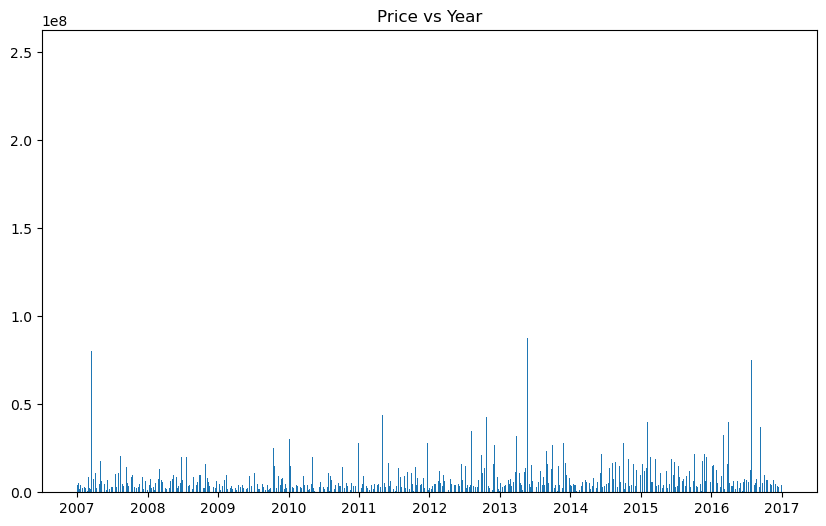

In [666]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Year'], merged_df['price'])
plt.title('Price vs Year')
plt.show()

In [670]:
import seaborn as sns


In [679]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'])


In [681]:
merged_df

,price,State,Year,Count,Sheltered,Unsheltered
226079,NaN,Georgia,2007-01-01,22.0,True,True
208106,NaN,Arizona,2007-01-01,1191.0,False,True
259667,NaN,New York,2007-01-01,40.0,False,True
88807,541000.0,Illinois,2007-01-01,1018.0,True,True
88808,541000.0,Illinois,2007-01-01,3927.0,False,True
...,...,...,...,...,...,...
23606,3133000.0,California,2016-12-30,NaN,NaN,NaN
23605,770000.0,California,2016-12-30,NaN,NaN,NaN
23604,1175000.0,California,2016-12-30,NaN,NaN,NaN
91885,165000.0,Iowa,2016-12-30,NaN,NaN,NaN


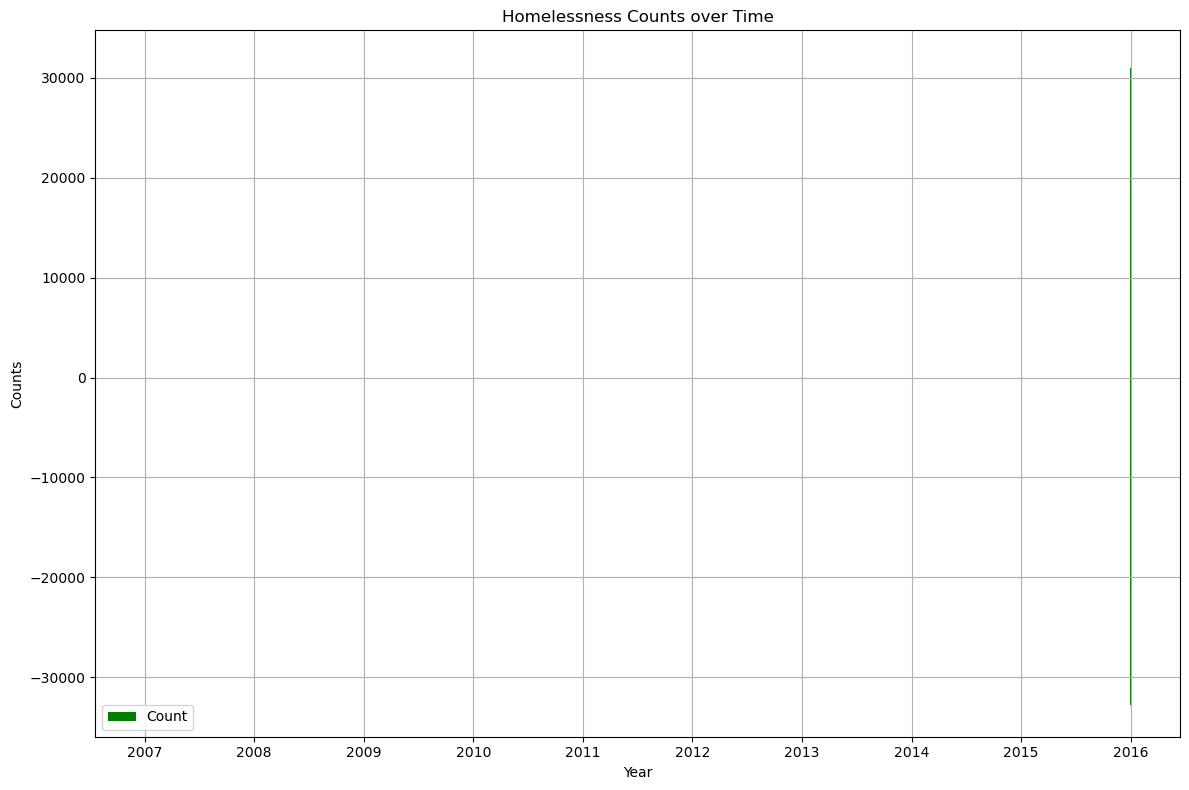

In [694]:

# Plotting
plt.figure(figsize=(12, 8))

plt.bar(merged_df['Year'], merged_df['Count'], color='green', label='Count')

plt.title('Homelessness Counts over Time')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

###### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN